<a href="https://colab.research.google.com/github/SinghReena/MachineLearning/blob/master/Class_15_(Files_and_Exceptions).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1.1 Introduction**

Variables, lists, tuples, dictionaries, sets, arrays, pandas Series and pandas DataFrames offer only temporary data storage. The data is lost when a local variable “goes out of scope” or when the program terminates. Files provide long-term retention of typically large amounts of data, even after the program that created the data terminates, so data maintained in files is persistent. Computers store files on secondary storage devices, including solid-state drives, hard disks and more. In this colab, we explain how Python programs create, update and process data files.

We consider text files in several popular formats—plain text, JSON (JavaScript Object Notation) and CSV (comma-separated values).

**1.2 Files**

Python views a text file as a sequence of characters and a binary file (for images, videos and more) as a sequence of bytes. As in lists and arrays, the first character in a text file and byte in a binary file is located at position 0, so in a file of n characters or bytes, the highest position number is n – 1. The diagram below shows a conceptual view of a file:

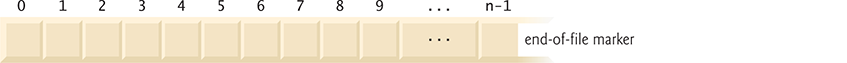

For each file you open, Python creates a file object that you’ll use to interact with the file.

*End of File*

Every operating system provides a mechanism to denote the end of a file. Some represent it with an end-of-file marker (as in the preceding figure), while others might maintain a count of the total characters or bytes in the file. Programming languages generally hide these operating-system details from you.

*Standard File Objects*

When a Python program begins execution, it creates three standard file objects:

sys.stdin—the standard input file object

sys.stdout—the standard output file object, 

and sys.stderr—the standard error file object.

Though these are considered file objects, they do not read from or write to files by default. The input function implicitly uses sys.stdin to get user input from the keyboard. Function print implicitly outputs to sys.stdout, which appears in the command line. Python implicitly outputs program errors and tracebacks to sys.stderr, which also appears in the command line. You must import the sys module if you need to refer to these objects explicitly in your code, but this is rare.

**1.3 Text-File Processing**

Write a simple text file that might be used by an accounts-receivable system to track the money owed by a company’s clients. Read that text file to confirm that it contains the data. For each client, Store the client’s account number, last name and account balance owed to the company. Together, these data fields represent a client record. Python imposes no structure on a file, so notions such as records do not exist natively in Python. Programmers must structure files to meet their applications’ requirements. Create and maintain this file in order by account number. In this sense, the account number may be thought of as a record key.

**1.3.1 Writing to a Text File: Introducing the with Statement**

Let’s create an accounts.txt file and write five client records to the file. Generally, records in text files are stored one per line, so we end each record with a newline character:

In [ ]:
with open('accounts.txt', mode='w') as accounts:
  accounts.write('100 Jones 24.98\n')
  accounts.write('200 Doe 345.67\n')
  accounts.write('300 White 0.00\n')
  accounts.write('400 Stone -42.16\n')
  accounts.write('500 Rich 224.62\n')

You can also write to a file with print (which automatically outputs a \n), as in



print('100 Jones 24.98', file=accounts)

*The with Statement*

Many applications acquire resources, such as files, network connections, database connections and more. You should release resources as soon as they’re no longer needed. This practice ensures that other applications can use the resources. Python’s with statement:

acquires a resource (in this case, the file object for accounts.txt) and assigns its corresponding object to a variable (accounts in this example),

allows the application to use the resource via that variable, and

calls the resource object’s close method to release the resource when program control reaches the end of the with statement’s suite.

*Built-In Function open*

The built-in open function opens the file accounts.txt and associates it with a file object. The mode argument specifies the file-open mode, indicating whether to open a file for reading from the file, for writing to the file or both. The mode 'w' opens the file for writing, creating the file if it does not exist. If you do not specify a path to the file, Python creates it in the current folder. Be careful—opening a file for writing deletes all the existing data in the file. By convention, the .txt file extension indicates a plain text file.

*Writing to the File*

The with statement assigns the object returned by open to the variable accounts in the as clause. In the with statement’s suite, we use the variable accounts to interact with the file. In this case, we call the file object’s write method five times to write five records to the file, each as a separate line of text ending in a newline. At the end of the with statement’s suite, the with statement implicitly calls the file object’s close method to close the file.

*Contents of accounts.txt File*

After executing the previous snippet, your directory contains the file accounts.txt with the following contents, which you can view by opening the file in a text editor:

100 Jones 24.98

200 Doe 345.67

300 White 0.00

400 Stone -42.16 

500 Rich 224.62

In the next section, you’ll read the file and display its contents.

**1.3.2 Reading Data from a Text File**

We just created the text file accounts.txt and wrote data to it. Now let’s read that data from the file sequentially from beginning to end. The following session reads records from the file accounts.txt and displays the contents of each record in columns with the Account and Name columns left aligned and the Balance column right aligned, so the decimal points align vertically:

In [ ]:
with open('accounts.txt', mode='r') as accounts:
  print(f'{"Account":<10}{"Name":<10}{"Balance":>10}')
  for record in accounts:
    account, name, balance = record.split()
    print(f'{account:<10}{name:<10}{balance:>10}')

Account   Name         Balance
100       Jones          24.98
200       Doe           345.67
300       White           0.00
400       Stone         -42.16
500       Rich          224.62


If the contents of a file should not be modified, open the file for reading only—another example of the principle of least privilege. This prevents the program from accidentally modifying the file. You open a file for reading by passing the 'r' file-open mode as function open’s second argument. If you do not specify the folder in which to store the file, open assumes the file is in the current folder.

Iterating through a file object, as shown in the preceding for statement, reads one line at a time from the file and returns it as a string. For each record (that is, line) in the file, string method split returns tokens in the line as a list, which we unpack into the variables account, name and balance. The last statement in the for statement’s suite displays these variables in columns using field widths.

*File Method readlines*

The file object’s readlines method also can be used to read an entire text file. The method returns each line as a string in a list of strings. For small files, this works well, but iterating over the lines in a file object, as shown above, can be more efficient. Calling readlines for a large file can be a time-consuming operation, which must complete before you can begin using the list of strings. Using the file object in a for statement enables your program to process each text line as it’s read.

https://docs.python.org/3/tutorial/inputoutput.html#methods-of-file-objects.

*Seeking to a Specific File Position*

While reading through a file, the system maintains a file-position pointer representing the location of the next character to read. Sometimes it’s necessary to process a file sequentially from the beginning several times during a program’s execution. Each time, you must reposition the file-position pointer to the beginning of the file, which you can do either by closing and reopening the file, or by calling the file object’s seek method, as in

file_object.seek(0)

The latter approach is faster.

**1.4 Updating Text Files**

Formatted data written to a text file cannot be modified without the risk of destroying other data. If the name 'White' needs to be changed to 'Williams' in accounts.txt, the old name cannot simply be overwritten. The original record for White is stored as

300 White 0.00

If you overwrite the name 'White' with the name 'Williams', the record becomes

300 Williams00

The new last name contains three more characters than the original one, so the characters beyond the second “i” in 'Williams' overwrite other characters in the line. The problem is that in the formatted input–output model, records and their fields can vary in size. For example, 7, 14, –117, 2074 and 27383 are all integers and are stored in the same number of “raw data” bytes internally (typically 4 or 8 bytes in today’s systems). However, when these integers are output as formatted text, they become different-sized fields. For example, 7 is one character, 14 is two characters and 27383 is five characters.

To make the preceding name change, we can:



* copy the records before 300 White 0.00 into a temporary file,
* write the updated and correctly formatted record for account 300 to this file,
* copy the records after 300 White 0.00 to the temporary file,
* delete the old file and
* rename the temporary file to use the original file’s name.








This can be cumbersome because it requires processing every record in the file, even if you need to update only one record. Updating a file as described above is more efficient when an application needs to update many records in one pass of the file.

*Updating accounts.txt*

Let’s use a with statement to update the accounts.txt file to change account 300’s name from 'White' to 'Williams' as described above:

In [ ]:
accounts = open('accounts.txt', 'r')




In [ ]:
temp_file = open('temp_file.txt', 'w')

In [ ]:
with accounts, temp_file:
  for record in accounts:
    account, name, balance = record.split()
    if account != '300':
      temp_file.write(record)
    else:
      new_record = ' '.join([account, 'Williams', balance])
      temp_file.write(new_record + '\n')

For readability, we opened the file objects (snippets [12] and [13]), then specified their variable names in the first line of snippet [14]. This with statement manages two resource objects, specified in a comma-separated list after with. The for statement unpacks each record into account, name and balance. If the account is not '300', we write record (which contains a newline) to temp_file. Otherwise, we assemble the new record containing 'Williams' in place of 'White' and write it to the file. After snippet [14], temp_file.txt contains:

100 Jones 24.98

200 Doe 345.67

300 Williams 0.00

400 Stone -42.16
 
500 Rich 224.62

*os Module File-Processing Functions*

At this point, we have the old accounts.txt file and the new temp_file.txt. To complete the update, let’s delete the old accounts.txt file, then rename temp_file.txt as accounts.txt. The os module provides functions for interacting with the operating system, including several that manipulate your system’s files and directories. Now that we’ve created the temporary file, let’s use the remove function to delete the original file:

https://docs.python.org/3/library/os.html.

In [ ]:
import os

In [ ]:
os.remove('accounts.txt')

Next, let’s use the rename function to rename the temporary file as 'accounts.txt':

In [ ]:
os.rename('temp_file.txt', 'accounts.txt')

**1.5 Handling Exceptions**

Various types of exceptions can occur when you work with files, including:



*   A FileNotFoundError occurs if you attempt to open a non-existent file for reading with the 'r' or 'r+' modes.
*   A PermissionsError occurs if you attempt an operation for which you do not have permission. This might occur if you try to open a file that your account is not allowed to access or create a file in a folder where your account does not have permission to write, such as where your computer’s operating system is stored.
*   A ValueError (with the error message 'I/O operation on closed file.') occurs when you attempt to write to a file that has already been closed.






**1.5.1  Division by Zero and Invalid Input**

*Division By Zero*

Recall that attempting to divide by 0 results in a ZeroDivisionError:

In [ ]:
10 / 0

ZeroDivisionError: ignored

*Invalid Input*

Recall that the int function raises a ValueError if you attempt to convert to an integer a string (like 'hello') that does not represent a number:

In [ ]:
value = int(input('Enter an integer: '))

Enter an integer: hello


ValueError: ignored

**1.5.2 try Statements**

Now let’s see how to handle these exceptions so that you can enable code to continue processing. Consider the following script and sample execution. Its loop attempts to read two integers from the user, then display the first number divided by the second. The script uses exception handling to catch and handle (i.e., deal with) any ZeroDivisionErrors and ValueErrors that arise—in this case, allowing the user to re-enter the input.

In [ ]:
# dividebyzero.py
"""Simple exception handling example."""
while True:
  # attempt to convert and divide values
  try:
    number1 = int(input('Enter numerator: '))
    number2 = int(input('Enter denominator: '))
    result = number1 / number2
  except ValueError: # tried to convert non-numeric value to int
    print('You must enter two integers\n')
  except ZeroDivisionError: # denominator was 0
    print('Attempted to divide by zero\n')
  else: # executes only if no exceptions occur
    print(f'{number1:.3f} / {number2:.3f} = {result:.3f}')
    break # terminate the loop

Enter numerator: 5
Enter denominator: reena
You must enter two integers

Enter numerator: 6
Enter denominator: 0
Attempted to divide by zero

Enter numerator: 12
Enter denominator: 2
12.000 / 2.000 = 6.000


*try Clause*

Python uses try statements to enable exception handling. The try statement’s try clause begins with keyword try, followed by a colon (:) and a suite of statements that might raise exceptions.

*except Clause*

A try clause may be followed by one or more except clauses that immediately follow the try clause’s suite. These also are known as exception handlers. Each except clause specifies the type of exception it handles. In this example, each exception handler just displays a message indicating the problem that occurred.

*else Clause*

After the last except clause, an optional else clause specifies code that should execute only if the code in the try suite did not raise exceptions. If no exceptions occur in this example’s try suite, print statement displays the division result and break terminates the loop.

**1.5.3 Catching Multiple Exceptions in One except Clause**

It’s relatively common for a try clause to be followed by several except clauses to handle various types of exceptions. If several except suites are identical, you can catch those exception types by specifying them as a tuple in a single except handler, as in:

except (type1, type2, …) as variable_name:

The as clause is optional. Typically, programs do not need to reference the caught exception object directly. If you do, you can use the variable in the as clause to reference the exception object in the except suite.

**1.5.4 What Exceptions Does a Function or Method Raise?**

Exceptions may surface via statements in a try suite, via functions or methods called directly or indirectly from a try suite, or via the Python interpreter as it executes the code (for example, ZeroDivisionErrors).

Before using any function or method, read its online API documentation, which specifies what exceptions are thrown (if any) by the function or method and indicates reasons why such exceptions may occur. Next, read the online API documentation for each exception type to see potential reasons why such an exception occurs.

**1.5.5 What Code Should Be Placed in a try Suite?**

Place in a try suite a significant logical section of a program in which several statements can raise exceptions, rather than wrapping a separate try statement around every statement that raises an exception. However, for proper exception-handling granularity, each try statement should enclose a section of code small enough that, when an exception occurs, the specific context is known and the except handlers can process the exception properly. If many statements in a try suite raise the same exception types, multiple try statements may be required to determine each exception’s context.

**1.6 finally  Clause**

Operating systems typically can prevent more than one program from manipulating a file at once. When a program finishes processing a file, the program should close it to release the resource. This enables other programs to use the file (if they’re allowed to access it). Closing the file helps prevent a resource leak in which the file resource is not available to other programs because a program using the file never closes it.

*The finally Clause of the try Statement*

A try statement may have a finally clause as its last clause after any except clauses or else clause. The finally clause is guaranteed to execute, regardless of whether its try suite executes successfully or an exception occurs. In other languages that have finally, this makes the finally suite an ideal location to place resource-deallocation code for resources acquired in the corresponding try suite. In Python, we prefer the with statement for this purpose and place other kinds of “clean up” code in the finally suite.

# The only reason a finally suite will not execute if program control enters the corresponding try suite is if the application terminates first, for example by calling the sys module’s exit function. In this case, the operating system would “clean up” any resources that the program did not release.

*Example*

The following IPython session demonstrates that the finally clause always executes, regardless of whether an exception occurs in the corresponding try suite. First, let’s consider a try statement in which no exceptions occur in the try suite:

In [ ]:
try:
  print('try suite with no exceptions raised')
except:
  print('this will not execute')
else:
  print('else executes because no exceptions in the try suite')
finally:
  print('finally always executes')

try suite with no exceptions raised
else executes because no exceptions in the try suite
finally always executes


The preceding try suite displays a message but does not raise any exceptions. When program control successfully reaches the end of the try suite, the except clause is skipped, the else clause executes and the finally clause displays a message showing that it always executes. When the finally clause terminates, program control continues with the next statement after the try statement.

Now let’s consider a try statement in which an exception occurs in the try suite:


In [ ]:
try:
  print('try suite that raises an exception')
  int('hello')
  print('this will not execute')
except ValueError:
  print('a ValueError occurred')
else:
  print('else will not execute because an exception occurred')
finally:
  print('finally always executes')

try suite that raises an exception
a ValueError occurred
finally always executes


This try suite begins by displaying a message. The second statement attempts to convert the string 'hello' to an integer, which causes the int function to raise a ValueError. The try suite immediately terminates, skipping its last print statement. The except clause catches the ValueError exception and displays a message. The else clause does not execute because an exception occurred. Then, the finally clause displays a message showing that it always executes. When the finally clause terminates, program control continues with the next statement after the try statement.

*Combining with Statements and try…except Statements*

Most resources that require explicit release, such as files, network connections and database connections, have potential exceptions associated with processing those resources. For example, a program that processes a file might raise IOErrors. For this reason, robust file-processing code normally appears in a try suite containing a with statement to guarantee that the resource gets released. The code is in a try suite, so you can catch in except handlers any exceptions that occur and you do not need a finally clause because the with statement handles resource deallocation.

To demonstrate this, first let’s assume you’re asking the user to supply the name of a file and they provide that name incorrectly, such as accountz.txt rather than the file we created earlier accounts.txt. In this case, the open call raises a FileNotFoundError by attempting to open a non-existent file:

In [ ]:
open('accountz.txt')

FileNotFoundError: ignored

To catch exceptions like FileNotFoundError that occur when you try to open a file for reading, wrap the with statement in a try suite, as in:

In [ ]:
try:
  with open('accountz.txt', 'r') as accounts:
    print(f'{"Account":<10}{"Name":<10}{"Balance":>10}')
    for record in accounts:
      account, name, balance = record.split()
      print(f'{account:<10}{name:<10}{balance:>10}')
except FileNotFoundError:
  print('The file name you specified does not exist')

The file name you specified does not exist


**1.7 Explicitly Raising an Exception**

You’ve seen various exceptions raised by your Python code. Sometimes you might need to write functions that raise exceptions to inform callers of errors that occur. The raise statement explicitly raises an exception. The simplest form of the raise statement is

raise ExceptionClassName


The raise statement creates an object of the specified exception class. Optionally, the exception class name may be followed by parentheses containing arguments to initialize the exception object—typically to provide a custom error message string. Code that raises an exception first should release any resources acquired before the exception occurred. In the next section, we’ll show an example of raising an exception.

In most cases, when you need to raise an exception, it’s recommended that you use one of Python’s many built-in exception types listed at:


https://docs.python.org/3/library/exceptions.html

